In [1]:
%matplotlib inline

In [2]:
import csv
import pandas as pd
import numpy as np
import os
from datetime import datetime
import calendar

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import linregress

import scipy.stats as stats

from spread import variance, standard_deviation, zipped_z_scores

import warnings
warnings.filterwarnings('ignore')



2.0
1.4142135623730951
[(-2, -1.414213562373095), (-1, -0.7071067811865475), (0, 0.0), (1, 0.7071067811865475), (2, 1.414213562373095)]


In [3]:
# Global declarations
data_path = "..\data"

dataFile = "AvgTempCYear_1.csv"

#Output folders
result_dir = "..\output"
image_dir = "..\images"

# Plot Style to use
mpl.style.use('seaborn')




In [4]:
#read data file
tempDF = pd.read_csv(os.path.join(data_path, dataFile))

tempDF.head()

,Country,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,ALGERIA,1975,8.9,10.3,12.1,16.4,20.7,23.8,28.5,27.8,24.7,18.9,12.8,10.9
1,ALGERIA,1976,8.6,10.6,11.3,15.8,19.7,24.9,27.5,25.0,24.2,19.0,11.7,11.1
2,ALGERIA,1977,11.0,12.4,14.8,16.9,20.0,23.0,28.7,26.0,24.0,19.4,14.0,11.7
3,ALGERIA,1978,9.1,13.1,13.8,16.9,20.0,25.1,28.1,27.8,24.8,17.8,12.6,12.9
4,ALGERIA,1979,13.0,12.1,14.4,15.0,21.0,26.5,29.3,29.2,23.8,20.0,11.5,10.2


In [5]:
#check for missing values
print(f"Missing values total - {tempDF.isnull().values.sum()}")

#mising rows
nullRows = tempDF[tempDF.isnull().any(axis = 1)]

print(f"Number of rows ith missing data : {nullRows.count()}")

nullRows

Missing values total - 1709
Number of rows ith missing data : Country    644
Year       644
Jan        505
Feb        507
Mar        520
Apr        524
May        516
Jun        530
Jul        511
Aug        499
Sep        514
Oct        504
Nov        499
Dec        390
dtype: int64


,Country,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
18,ALGERIA,1993,NaN,9.9,13.2,16.9,21.5,27.0,29.0,29.3,24.8,20.0,16.2,10.6
43,ALGERIA,2018,10.9,10.4,15.1,18.6,21.4,26.7,32.1,28.8,26.6,20.1,14.7,NaN
76,AMERICAN SAMOA (U.S.A.),2007,28.5,28.7,28.7,28.9,28.2,NaN,28.3,28.4,28.3,28.5,28.7,28.6
77,AMERICAN SAMOA (U.S.A.),2008,28.6,29.0,28.6,NaN,NaN,27.3,NaN,NaN,27.4,28.2,28.5,29.2
78,AMERICAN SAMOA (U.S.A.),2009,29.5,29.7,29.6,NaN,27.7,27.3,27.0,NaN,NaN,27.3,27.4,27.4
79,AMERICAN SAMOA (U.S.A.),2010,29.4,NaN,NaN,28.3,28.2,NaN,NaN,NaN,NaN,NaN,27.2,NaN
80,AMERICAN SAMOA (U.S.A.),2011,NaN,26.8,27.7,28.0,27.4,27.3,27.6,26.8,27.2,27.5,27.1,27.6
83,AMERICAN SAMOA (U.S.A.),2014,NaN,28.5,28.3,27.6,27.6,27.2,26.4,26.7,27.9,28.6,27.6,27.9
87,AMERICAN SAMOA (U.S.A.),2018,27.8,28.0,28.3,27.6,27.7,27.9,26.9,26.7,27.5,27.7,28.1,NaN
131,ANTARCTICA,2018,-3.9,-7.1,-11.6,-13.8,-17.1,-17.2,-19.5,-19.7,-20.1,-15.2,-8.6,NaN


In [6]:
# fill the NA with rowwise means
rowMeans = tempDF[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].mean(axis = 1)
rowMeans

tempDF = tempDF.apply(lambda r: r.fillna(rowMeans[r.index]))

In [7]:
print(f"Missing values total - {tempDF.isnull().values.sum()}")

Missing values total - 0


## START ANALYSIS

In [8]:
# Reshape Temp data, such that months are in rows and data col is added
# USE melt() to change the column-wise months into row-wse data

temp_flatDF = pd.melt(tempDF, id_vars =['Country','Year'], var_name = 'Month', value_name = "Monthly_Temp")

temp_flatDF.head()

,Country,Year,Month,Monthly_Temp
0,ALGERIA,1975,Jan,8.9
1,ALGERIA,1976,Jan,8.6
2,ALGERIA,1977,Jan,11.0
3,ALGERIA,1978,Jan,9.1
4,ALGERIA,1979,Jan,13.0


In [9]:
#Convert month names to month number
month_num = dict((v,k) for k,v in enumerate(calendar.month_abbr))

temp_flatDF['Month_Num'] = temp_flatDF['Month'].apply(lambda r: month_num[r] )

temp_flatDF.head()

,Country,Year,Month,Monthly_Temp,Month_Num
0,ALGERIA,1975,Jan,8.9,1
1,ALGERIA,1976,Jan,8.6,1
2,ALGERIA,1977,Jan,11.0,1
3,ALGERIA,1978,Jan,9.1,1
4,ALGERIA,1979,Jan,13.0,1


In [10]:
# Add Date column, example 01-Jan-1975
temp_flatDF['Date'] = temp_flatDF['Year'].astype(str)+'-'+temp_flatDF['Month_Num'].astype(str)+'-01'
temp_flatDF.head()
#temp_flatDF['Date'] = 
temp_flatDF['Date'] = temp_flatDF['Date'].apply(lambda r: datetime.strptime(r , '%Y-%m-%d'))

temp_flatDF.sort_values(by = ['Year','Month_Num'])

temp_flatDF.head()


,Country,Year,Month,Monthly_Temp,Month_Num,Date
0,ALGERIA,1975,Jan,8.9,1,1975-01-01
1,ALGERIA,1976,Jan,8.6,1,1976-01-01
2,ALGERIA,1977,Jan,11.0,1,1977-01-01
3,ALGERIA,1978,Jan,9.1,1,1978-01-01
4,ALGERIA,1979,Jan,13.0,1,1979-01-01


### Using rolling() function, calculate a moving average across the years

In [11]:
# Group by year and month and aggregate values by mean()

temp_GDF_YM = temp_flatDF.groupby(['Year','Date','Month_Num']).agg(np.mean)

temp_GDF_YM.reset_index(inplace = True)


temp_GDF_YM.sort_values(by = ['Year','Month_Num'])

temp_GDF_YM.head()
#temp_GDF_YM.dtypes

,Year,Date,Month_Num,Monthly_Temp
0,1975,1975-01-01,1,12.086667
1,1975,1975-02-01,2,12.323333
2,1975,1975-03-01,3,14.387348
3,1975,1975-04-01,4,16.607500
4,1975,1975-05-01,5,18.815833


In [15]:
temp_movAvg_DF = temp_GDF_YM[['Date','Monthly_Temp']].rolling(window = 12, on = 'Date').mean()

#temp_movAvg_DF.set_index('Date', inplace = True)

#get year
temp_movAvg_DF['Year'] = temp_movAvg_DF['Date'].apply(lambda r : r.year)

# get time delta in months so we can how temperature varies
temp_movAvg_DF.set_index('Date', inplace = True)
timedel = (temp_movAvg_DF.index - temp_movAvg_DF.index[0])

temp_movAvg_DF['days'] = timedel.days

temp_movAvg_DF.count()
#temp_movAvg_DF.dtypes

Monthly_Temp    517
Year            528
days            528
dtype: int64

## Analyse Data - Regression

In [13]:
#
# Set line
#x_axis = temp_movAvg_DF['Year']
x_axis = temp_movAvg_DF['days']
y_axis = temp_movAvg_DF['Monthly_Temp'] 

#mask is boolean values that tells lineregress to use or ignore values
mask = ~np.isnan(x_axis) & ~np.isnan(y_axis)


(slope, intercept, r_value, p_value, std_err) = linregress(x_axis[mask], y_axis[mask])
fit = slope * x_axis + intercept
print(f"Slope of the regression line is {slope}")
print(f"r-Value of the regression line is {r_value}")
print(f"p-Value of the regression line is {p_value}")


Slope of the regression line is 9.110166256879549e-05
r-Value of the regression line is 0.9238661243419877
p-Value of the regression line is 5.7731781547738994e-217


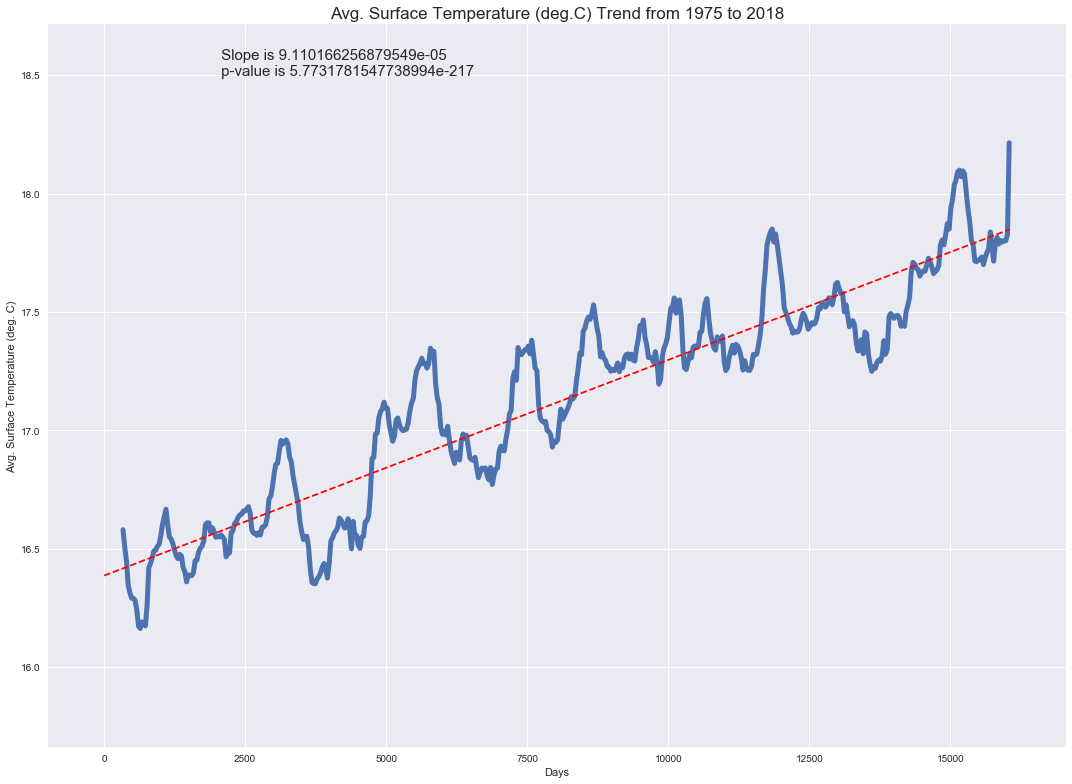

In [16]:
# Plot a simple timeseries plot
fig,ax = plt.subplots(figsize = (15,11))

ax.plot(x_axis,y_axis, linewidth = 5)

ax.plot(x_axis, fit, 'r--')

ax.set_xlim(x_axis.min()-1000, x_axis.max()+1000)
ax.set_ylim(y_axis.min()-0.5, y_axis.max()+0.5)


ax.set_xlabel("Days", fontsize = 11)
ax.set_ylabel("Avg. Surface Temperature (deg. C)", fontsize = 11)

ax.set_title(f"Avg. Surface Temperature (deg.C) Trend from {min(temp_movAvg_DF['Year'])} to {max(temp_movAvg_DF['Year'])}",\
             fontsize = 17)

ax.text(2000,18.5, f" Slope is {slope} \n p-value is {p_value}", fontsize = 15)

plt.tight_layout()

plt.savefig(os.path.join(image_dir, "AvgTemp_regressFit_rolling.png"))

plt.show()